# Datasets

All datasets are publically avaliable from the MetOffice and used under the Open Government Licence.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import netCDF4 as nc
from datetime import datetime, timedelta

The UK MetOffice collects data on meterological elements from (approximately uniformly dispersed) synoptic stations around the UK. These stations are approximately 40km apart and, where possible, are positioned in such a way that measurements are not unduly influenced by the local climate in the immediate vicinity of the station. It is possible for small scale weather, such as rainfall or thunderstorms, to avoid all of the synoptic stations and pass undetected in the network. Supplementary stations measuring a subset of meterological elements are positioned at points of interest throughout the country, such as in urban areas or on mountains.  

Documentation on how each measurement is sourced can be found on the [MetOffice website](https://www.metoffice.gov.uk/binaries/content/assets/metofficegovuk/pdf/research/library-and-archive/library/publications/factsheets/factsheet_17-observations.pdf).

### Monthly Average Temperature

The most relevant weather index we will consider is the daily average temperature. This is determined by the mean of the greatest and least recorded temperature in a 24 hour period. Temperature is recorded at an elevation of 1.25 metres above the ground by platinum resistance thermometers. These are platinum wires for which the resistance in the wire varies with the surrounding air temperature. The MetOffice provides temperature readings on a 1km squared precision. This is done by a weighted average of readings from surrounding synoptic stations around the location. This weighted average follows an inverse square law. The specificatons of this interpolation is documented on the MetOffice website [here](https://www.metoffice.gov.uk/binaries/content/assets/metofficegovuk/pdf/weather/learn-about/uk-past-events/papers/monthly_gridded_datasets_uk.pdf). 

In [2]:
fn = 'tas_hadukgrid_uk_region_mon_188401-202112.nc'
rootgroup = nc.Dataset(fn)
print(rootgroup)
print(rootgroup.__dict__)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    comment: Monthly resolution gridded climate observations
    creation_date: 2022-03-17T18:21:42
    frequency: mon
    institution: Met Office
    references: doi: 10.1002/joc.1161
    short_name: monthly_meantemp
    source: HadUK-Grid_v1.1.0.0
    title: Gridded surface climate observations data for the UK
    version: v20220310
    Conventions: CF-1.5
    dimensions(sizes): time(1656), region(16), bnds(2), string26(26)
    variables(dimensions): float64 tas(time, region), float64 time(time), float64 time_bnds(time, bnds), int32 region(region), |S1 geo_region(region, string26), int64 calendar_year(time), int64 month_number(time), int64 season_year(time)
    groups: 
{'comment': 'Monthly resolution gridded climate observations', 'creation_date': '2022-03-17T18:21:42', 'frequency': 'mon', 'institution': 'Met Office', 'references': 'doi: 10.1002/joc.1161', 'short_name': 'monthly_meantemp', 'source'

In [3]:
for dim in rootgroup.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 1656
<class 'netCDF4._netCDF4.Dimension'>: name = 'region', size = 16
<class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2
<class 'netCDF4._netCDF4.Dimension'>: name = 'string26', size = 26


In [4]:
for var in rootgroup.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float64 tas(time, region)
    standard_name: air_temperature
    long_name: Mean air temperature
    units: degC
    description: Mean air temperature
    label_units: C
    level: 1.5m
    plot_label: Mean air temperature at 1.5m (C)
    cell_methods: time: mid_range within days time: mean over days
    coordinates: calendar_year geo_region month_number season_year
unlimited dimensions: 
current shape = (1656, 16)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    axis: T
    bounds: time_bnds
    units: hours since 1800-01-01 00:00:00
    standard_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (1656,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
unlimited dimensions: 
current shape = (1656, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._net

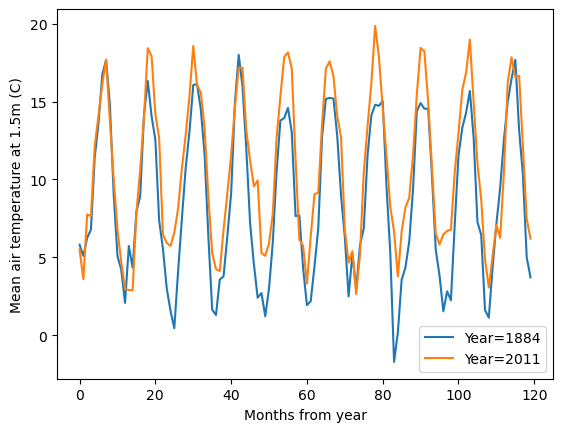

In [5]:
plt.plot(rootgroup['tas'][:120, 1], label="Year=1884")
plt.ylabel("Mean air temperature at 1.5m (C)")
plt.xlabel("Months from year")
plt.plot(rootgroup['tas'][-120:, 1], label="Year=2011")
plt.legend()
plt.show()

### Monthly Average Rainfall

In [6]:
fn = "rainfall_hadukgrid_uk_region_mon_183601-202112.nc"
rootgroup = nc.Dataset(fn)
print(rootgroup)
print(rootgroup.__dict__)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    comment: Monthly resolution gridded climate observations
    creation_date: 2022-03-17T18:21:49
    frequency: mon
    institution: Met Office
    references: doi: 10.1002/joc.1161
    short_name: monthly_rainfall
    source: HadUK-Grid_v1.1.0.0
    title: Gridded surface climate observations data for the UK
    version: v20220310
    Conventions: CF-1.5
    dimensions(sizes): time(2232), region(16), bnds(2), string26(26)
    variables(dimensions): float64 rainfall(time, region), float64 time(time), float64 time_bnds(time, bnds), int32 region(region), |S1 geo_region(region, string26), int64 calendar_year(time), int64 month_number(time), int64 season_year(time)
    groups: 
{'comment': 'Monthly resolution gridded climate observations', 'creation_date': '2022-03-17T18:21:49', 'frequency': 'mon', 'institution': 'Met Office', 'references': 'doi: 10.1002/joc.1161', 'short_name': 'monthly_rainfall', 'so

In [7]:
for var in rootgroup.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float64 rainfall(time, region)
    standard_name: lwe_thickness_of_precipitation_amount
    long_name: Total precipitation amount
    units: mm
    description: Total rainfall
    label_units: mm
    plot_label: Total rainfall (mm)
    cell_methods: time: sum
    coordinates: calendar_year geo_region month_number season_year
unlimited dimensions: 
current shape = (2232, 16)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    axis: T
    bounds: time_bnds
    units: hours since 1800-01-01 00:00:00
    standard_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (2232,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
unlimited dimensions: 
current shape = (2232, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
int32 region(region)
    u

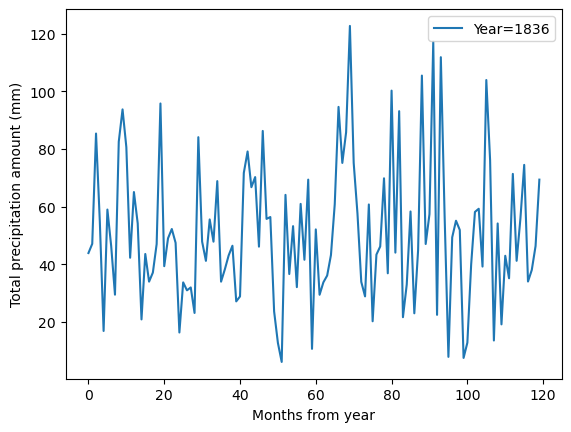

In [8]:
plt.plot(rootgroup['rainfall'][:120, 1], label="Year=1836")
plt.ylabel("Total precipitation amount (mm)")
plt.xlabel("Months from year")
plt.legend()
plt.show()

### Sunlight hours

In [9]:
fn = "sun_hadukgrid_uk_region_mon_191901-202112.nc"
rootgroup = nc.Dataset(fn)
print(rootgroup)
print(rootgroup.__dict__)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    comment: Monthly resolution gridded climate observations
    creation_date: 2022-03-17T18:21:45
    frequency: mon
    institution: Met Office
    references: doi: 10.1002/joc.1161
    short_name: monthly_sunshine
    source: HadUK-Grid_v1.1.0.0
    title: Gridded surface climate observations data for the UK
    version: v20220310
    Conventions: CF-1.5
    dimensions(sizes): time(1236), region(16), bnds(2), string26(26)
    variables(dimensions): float64 sun(time, region), float64 time(time), float64 time_bnds(time, bnds), int32 region(region), |S1 geo_region(region, string26), int64 calendar_year(time), int64 month_number(time), int64 season_year(time)
    groups: 
{'comment': 'Monthly resolution gridded climate observations', 'creation_date': '2022-03-17T18:21:45', 'frequency': 'mon', 'institution': 'Met Office', 'references': 'doi: 10.1002/joc.1161', 'short_name': 'monthly_sunshine', 'source'

In [10]:
for var in rootgroup.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float64 sun(time, region)
    standard_name: duration_of_sunshine
    long_name: Sunshine hours
    units: hour
    description: Sunshine hours
    label_units: h
    plot_label: Sunshine hours (h)
    cell_methods: time: sum
    coordinates: calendar_year geo_region month_number season_year
unlimited dimensions: 
current shape = (1236, 16)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    axis: T
    bounds: time_bnds
    units: hours since 1800-01-01 00:00:00
    standard_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (1236,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
unlimited dimensions: 
current shape = (1236, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
int32 region(region)
    units: 1
    standard_name: region


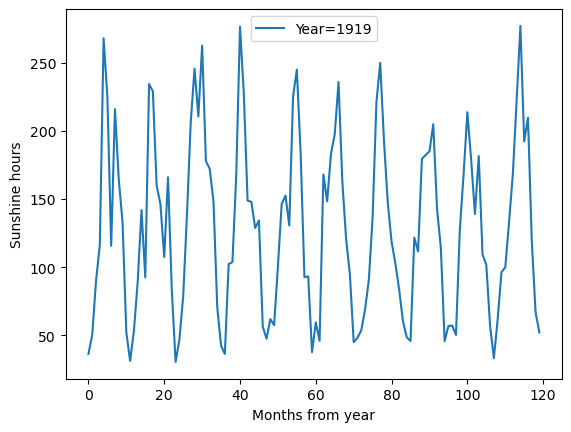

In [11]:
plt.plot(rootgroup['sun'][:120, 1], label="Year=1919")
plt.ylabel("Sunshine hours")
plt.xlabel("Months from year")
plt.legend()
plt.show()

### Daily temperatures

In [12]:
max_daily_dataset = nc.Dataset('tasmax_hadukgrid_uk_region_day_19600101-20211231.nc')
min_daily_dataset = nc.Dataset('tasmin_hadukgrid_uk_region_day_19600101-20211231.nc')

In [13]:
print(max_daily_dataset)
print(min_daily_dataset)
print(min_daily_dataset.groups.values())

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    comment: Daily resolution gridded climate observations
    creation_date: 2022-03-17T18:21:42
    frequency: day
    institution: Met Office
    references: doi: 10.1002/joc.1161
    short_name: daily_maxtemp
    source: HadUK-Grid_v1.1.0.0
    title: Gridded surface climate observations data for the UK
    version: v20220310
    Conventions: CF-1.5
    dimensions(sizes): time(22646), region(16), bnds(2), string26(26)
    variables(dimensions): float64 tasmax(time, region), float64 time(time), float64 time_bnds(time, bnds), int32 region(region), |S1 geo_region(region, string26)
    groups: 
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    comment: Daily resolution gridded climate observations
    creation_date: 2022-03-17T18:21:40
    frequency: day
    institution: Met Office
    references: doi: 10.1002/joc.1161
    short_name: daily_mintemp
    source: H

In [14]:
for var in min_daily_dataset.variables.values():
    print(var)

for var in max_daily_dataset.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float64 tasmin(time, region)
    standard_name: air_temperature
    long_name: Minimum air temperature
    units: degC
    description: Minimum air temperature
    label_units: C
    level: 1.5m
    plot_label: Minimum air temperature at 1.5m (C)
    cell_methods: time: minimum (comment: observing period is 0900 on day D-1 to 0900 on day D)
    coordinates: geo_region
unlimited dimensions: 
current shape = (22646, 16)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    axis: T
    bounds: time_bnds
    units: hours since 1800-01-01 00:00:00
    standard_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (22646,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
unlimited dimensions: 
current shape = (22646, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4

Let's see which administrative regions are in our dataset.

In [15]:
print(min_daily_dataset['geo_region'][:, ])

[[b'E' b'a' b's' b't' b' ' b'M' b'i' b'd' b'l' b'a' b'n' b'd' b's' b' '
  b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ']
 [b'E' b'a' b's' b't' b' ' b'o' b'f' b' ' b'E' b'n' b'g' b'l' b'a' b'n'
  b'd' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ']
 [b'E' b'a' b's' b't' b' ' b'S' b'c' b'o' b't' b'l' b'a' b'n' b'd' b' '
  b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ']
 [b'L' b'o' b'n' b'd' b'o' b'n' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' '
  b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ']
 [b'N' b'o' b'r' b't' b'h' b' ' b'E' b'a' b's' b't' b' ' b'E' b'n' b'g'
  b'l' b'a' b'n' b'd' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ']
 [b'N' b'o' b'r' b't' b'h' b' ' b'S' b'c' b'o' b't' b'l' b'a' b'n' b'd'
  b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ']
 [b'N' b'o' b'r' b't' b'h' b' ' b'W' b'e' b's' b't' b' ' b'E' b'n' b'g'
  b'l' b'a' b'n' b'd' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ']
 [b'S' b'o' b'u' b't' b'h' b' ' b'E' b'a' b's' b't' b' 

In [16]:
def convert_hours_to_datetime(hours):
    base_date = datetime(1800, 1, 1, 0, 0, 0)  # Base date for the calculation
    delta = timedelta(hours=hours)  # Create a timedelta based on the hours
    # Add the timedelta to the base date to get the resulting datetime
    result_datetime = base_date + delta
    return result_datetime.date()

In [17]:
region_daily_min = min_daily_dataset['tasmin'][:, 10]
region_daily_max = max_daily_dataset['tasmax'][:, 10]
data_dict = {'min': region_daily_min, 'max': region_daily_max, 'time': min_daily_dataset['time'][:]}
df = pd.DataFrame(data=data_dict)
df['avg'] = (df['min'] + df['max'])/2
df['date'] = df['time'].apply(convert_hours_to_datetime)
df.head(10)
df

,min,max,time,avg,date
0,4.305863,6.601297,1402524.0,5.453580,1960-01-01
1,-1.411669,4.437036,1402548.0,1.512684,1960-01-02
2,-1.022055,9.284908,1402572.0,4.131426,1960-01-03
3,1.510127,8.090085,1402596.0,4.800106,1960-01-04
4,1.510083,5.732871,1402620.0,3.621477,1960-01-05
...,...,...,...,...,...
22641,1.593865,6.234720,1945908.0,3.914293,2021-12-27
22642,2.635645,7.442762,1945932.0,5.039204,2021-12-28
22643,1.365149,11.244093,1945956.0,6.304621,2021-12-29
22644,4.658459,11.293582,1945980.0,7.976020,2021-12-30


To verify the dataset is clean:

In [18]:
print(df['max'].isnull().values.any())
print(df['min'].isnull().values.any())
print(df['avg'].isnull().values.any())

False
False
False


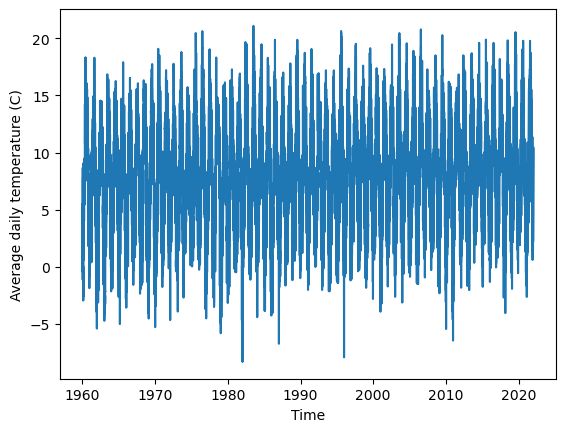

In [19]:
plt.plot(df['date'], df['avg'])
plt.xlabel("Time")
plt.ylabel("Average daily temperature (C)")
plt.show()

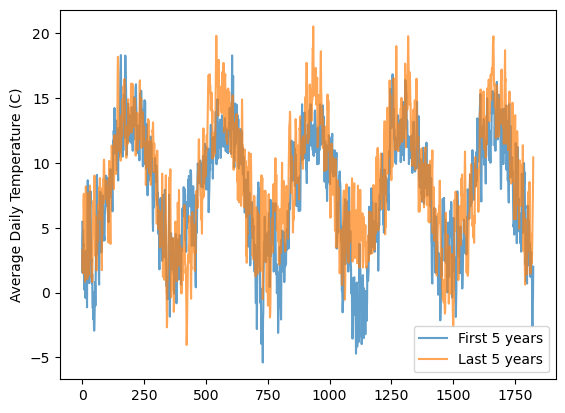

In [20]:
plt.plot(df['avg'][:365*5], label='First 5 years', alpha=0.7)
plt.plot(df['avg'][-365*5:].values, label='Last 5 years', alpha=0.7)
plt.ylabel("Average Daily Temperature (C)")
plt.legend()
plt.show()

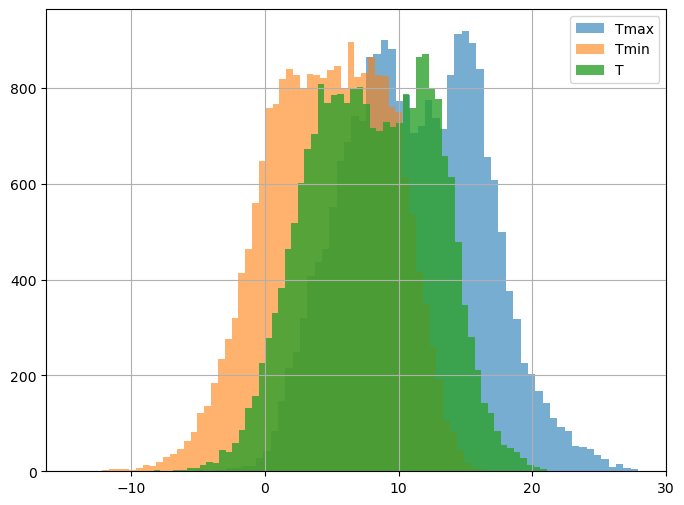

In [21]:
#temperature distributions in histogram
plt.figure(figsize=(8,6))
df['max'].hist(bins=60, alpha=0.6, label='Tmax')
df['min'].hist(bins=60, alpha=0.6, label='Tmin')
df['avg'].hist(bins=60, alpha=0.8, label='T')
plt.legend()
plt.show()